In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import fast_ml

In [3]:
data = pd.read_csv('Data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [5]:
data.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


<AxesSubplot:xlabel='Occupation', ylabel='Count'>

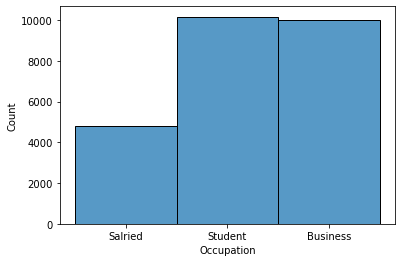

In [6]:
sns.histplot(data['Occupation'])

<AxesSubplot:xlabel='cholesterol_level', ylabel='Count'>

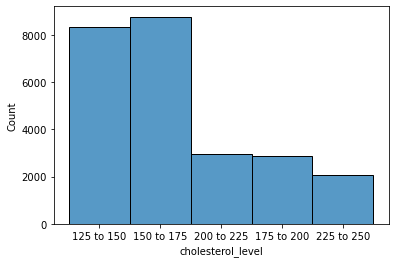

In [7]:
sns.histplot(data['cholesterol_level'])

<AxesSubplot:xlabel='Gender', ylabel='Count'>

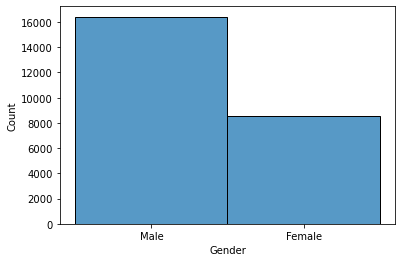

In [8]:
sns.histplot(data['Gender'])

<AxesSubplot:xlabel='smoking_status', ylabel='Count'>

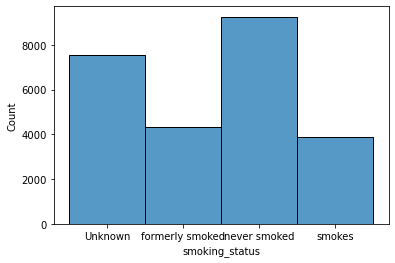

In [9]:
sns.histplot(data['smoking_status'])

<AxesSubplot:xlabel='Location', ylabel='Count'>

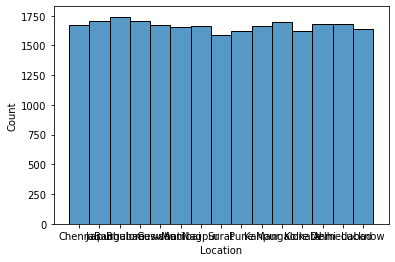

In [10]:
sns.histplot(data['Location'])

<AxesSubplot:xlabel='covered_by_any_other_company', ylabel='Count'>

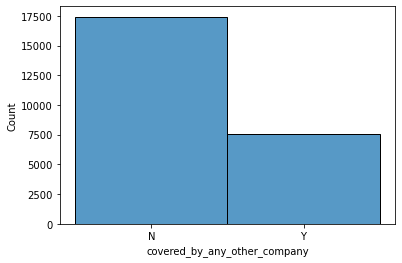

In [11]:
sns.histplot(data['covered_by_any_other_company'])

<AxesSubplot:xlabel='Alcohol', ylabel='Count'>

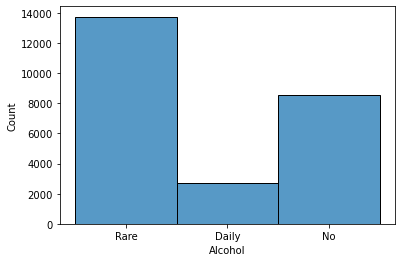

In [12]:
sns.histplot(data['Alcohol'])

<AxesSubplot:xlabel='exercise', ylabel='Count'>

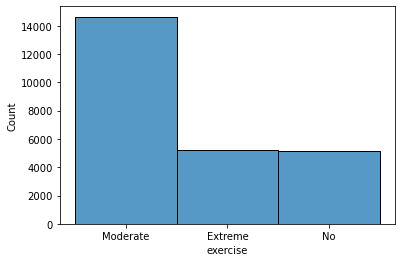

In [13]:
sns.histplot(data['exercise'])

In [14]:
data = data.drop('applicant_id',axis = 1)

In [15]:
data = data.drop('Location',axis=1 )

In [16]:
from sklearn.preprocessing import LabelEncoder
data['Occupation'] = data['Occupation'].map( {'Business':0,'Salried':0,'Student':1})
data['cholesterol_level'] = data['cholesterol_level'].map( {'125 to 150':137.5, '150 to 175':162.5, '175 to 200':187.5, '200 to 225':212.5, '225 to 250':237.5})
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['smoking_status'] = LabelEncoder().fit_transform(data['smoking_status'])
data['covered_by_any_other_company'] = LabelEncoder().fit_transform(data['covered_by_any_other_company'])
data['Alcohol'] = data['Alcohol'].map({'Daily':0,'Rare':0,"No":1})
data['exercise'] = data['exercise'].map({'Extreme':0,'Moderate':0,"No":1})
data.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,bmi,smoking_status,Year_last_admitted,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3,1,1,0,2,137.5,4866,28,1,0,...,31.2,0,NaN,67,0,0,0,1,25,20978
1,0,0,0,1,4,162.5,6411,50,0,0,...,34.2,1,NaN,58,0,0,0,3,27,6170
2,1,0,0,0,4,212.5,4509,68,0,0,...,40.4,1,NaN,73,0,0,0,0,32,28382
3,7,4,0,0,2,187.5,6214,51,0,0,...,22.9,0,NaN,71,1,0,1,3,37,27148
4,3,1,0,1,2,162.5,4938,44,0,1,...,26.5,2,2004.0,74,0,1,0,0,34,29616


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_lasy_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   Occupation                      25000 non-null  int64  
 4   visited_doctor_last_1_year      25000 non-null  int64  
 5   cholesterol_level               25000 non-null  float64
 6   daily_avg_steps                 25000 non-null  int64  
 7   age                             25000 non-null  int64  
 8   heart_decs_history              25000 non-null  int64  
 9   other_major_decs_history        25000 non-null  int64  
 10  Gender                          25000 non-null  int64  
 11  avg_glucose_level               25000 non-null  int64  
 12  bmi                             

In [18]:
data.isnull().sum()

years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [19]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)
data = data.drop('Year_last_admitted', axis = 1)

In [20]:
data.isnull().sum()

years_of_insurance_with_us        0
regular_checkup_lasy_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

In [21]:
cormat = data.corr()
round(cormat,3)

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,avg_glucose_level,bmi,smoking_status,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
years_of_insurance_with_us,1.000,0.019,0.016,0.002,0.003,-0.010,-0.001,0.004,-0.001,-0.011,...,-0.000,-0.013,-0.015,-0.006,0.261,0.001,0.003,-0.001,-0.003,0.001
regular_checkup_lasy_year,0.019,1.000,0.009,-0.009,-0.006,0.000,-0.002,0.009,0.000,-0.010,...,0.014,-0.008,0.000,-0.142,0.018,0.001,-0.006,-0.013,0.002,-0.174
adventure_sports,0.016,0.009,1.000,0.002,0.011,-0.009,-0.001,-0.002,0.003,0.004,...,-0.006,-0.002,-0.005,0.074,0.022,-0.003,0.006,-0.047,0.003,0.075
Occupation,0.002,-0.009,0.002,1.000,-0.014,-0.534,-0.045,0.000,-0.003,-0.006,...,0.000,0.008,0.005,-0.000,-0.002,-0.091,0.031,0.003,0.018,-0.000
visited_doctor_last_1_year,0.003,-0.006,0.011,-0.014,1.000,-0.042,-0.157,-0.001,-0.003,0.009,...,0.008,0.001,0.002,0.012,0.010,0.030,-0.028,-0.013,-0.043,0.009
cholesterol_level,-0.010,0.000,-0.009,-0.534,-0.042,1.000,0.024,-0.001,-0.007,0.002,...,-0.006,-0.005,0.003,-0.004,0.006,0.078,-0.017,-0.001,0.093,-0.001
daily_avg_steps,-0.001,-0.002,-0.001,-0.045,-0.157,0.024,1.000,-0.000,0.007,-0.004,...,0.000,-0.006,0.002,-0.006,-0.002,-0.073,0.079,0.008,0.046,-0.007
age,0.004,0.009,-0.002,0.000,-0.001,-0.001,-0.000,1.000,-0.004,0.004,...,-0.012,-0.015,-0.007,0.002,0.003,-0.001,0.003,-0.004,-0.008,0.005
heart_decs_history,-0.001,0.000,0.003,-0.003,-0.003,-0.007,0.007,-0.004,1.000,0.107,...,-0.005,0.039,0.048,-0.004,0.006,0.005,0.005,0.005,-0.004,-0.000
other_major_decs_history,-0.011,-0.010,0.004,-0.006,0.009,0.002,-0.004,0.004,0.107,1.000,...,0.001,0.159,0.111,-0.004,-0.009,-0.008,0.001,0.002,0.001,-0.002


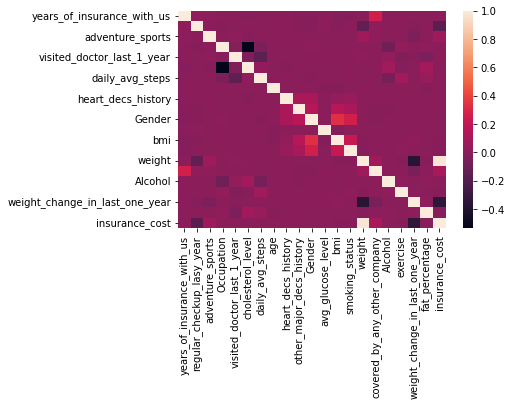

In [22]:
sns.heatmap(cormat);

In [23]:
data = data.drop('Occupation', axis = 1)
data = data.drop('heart_decs_history', axis = 1)

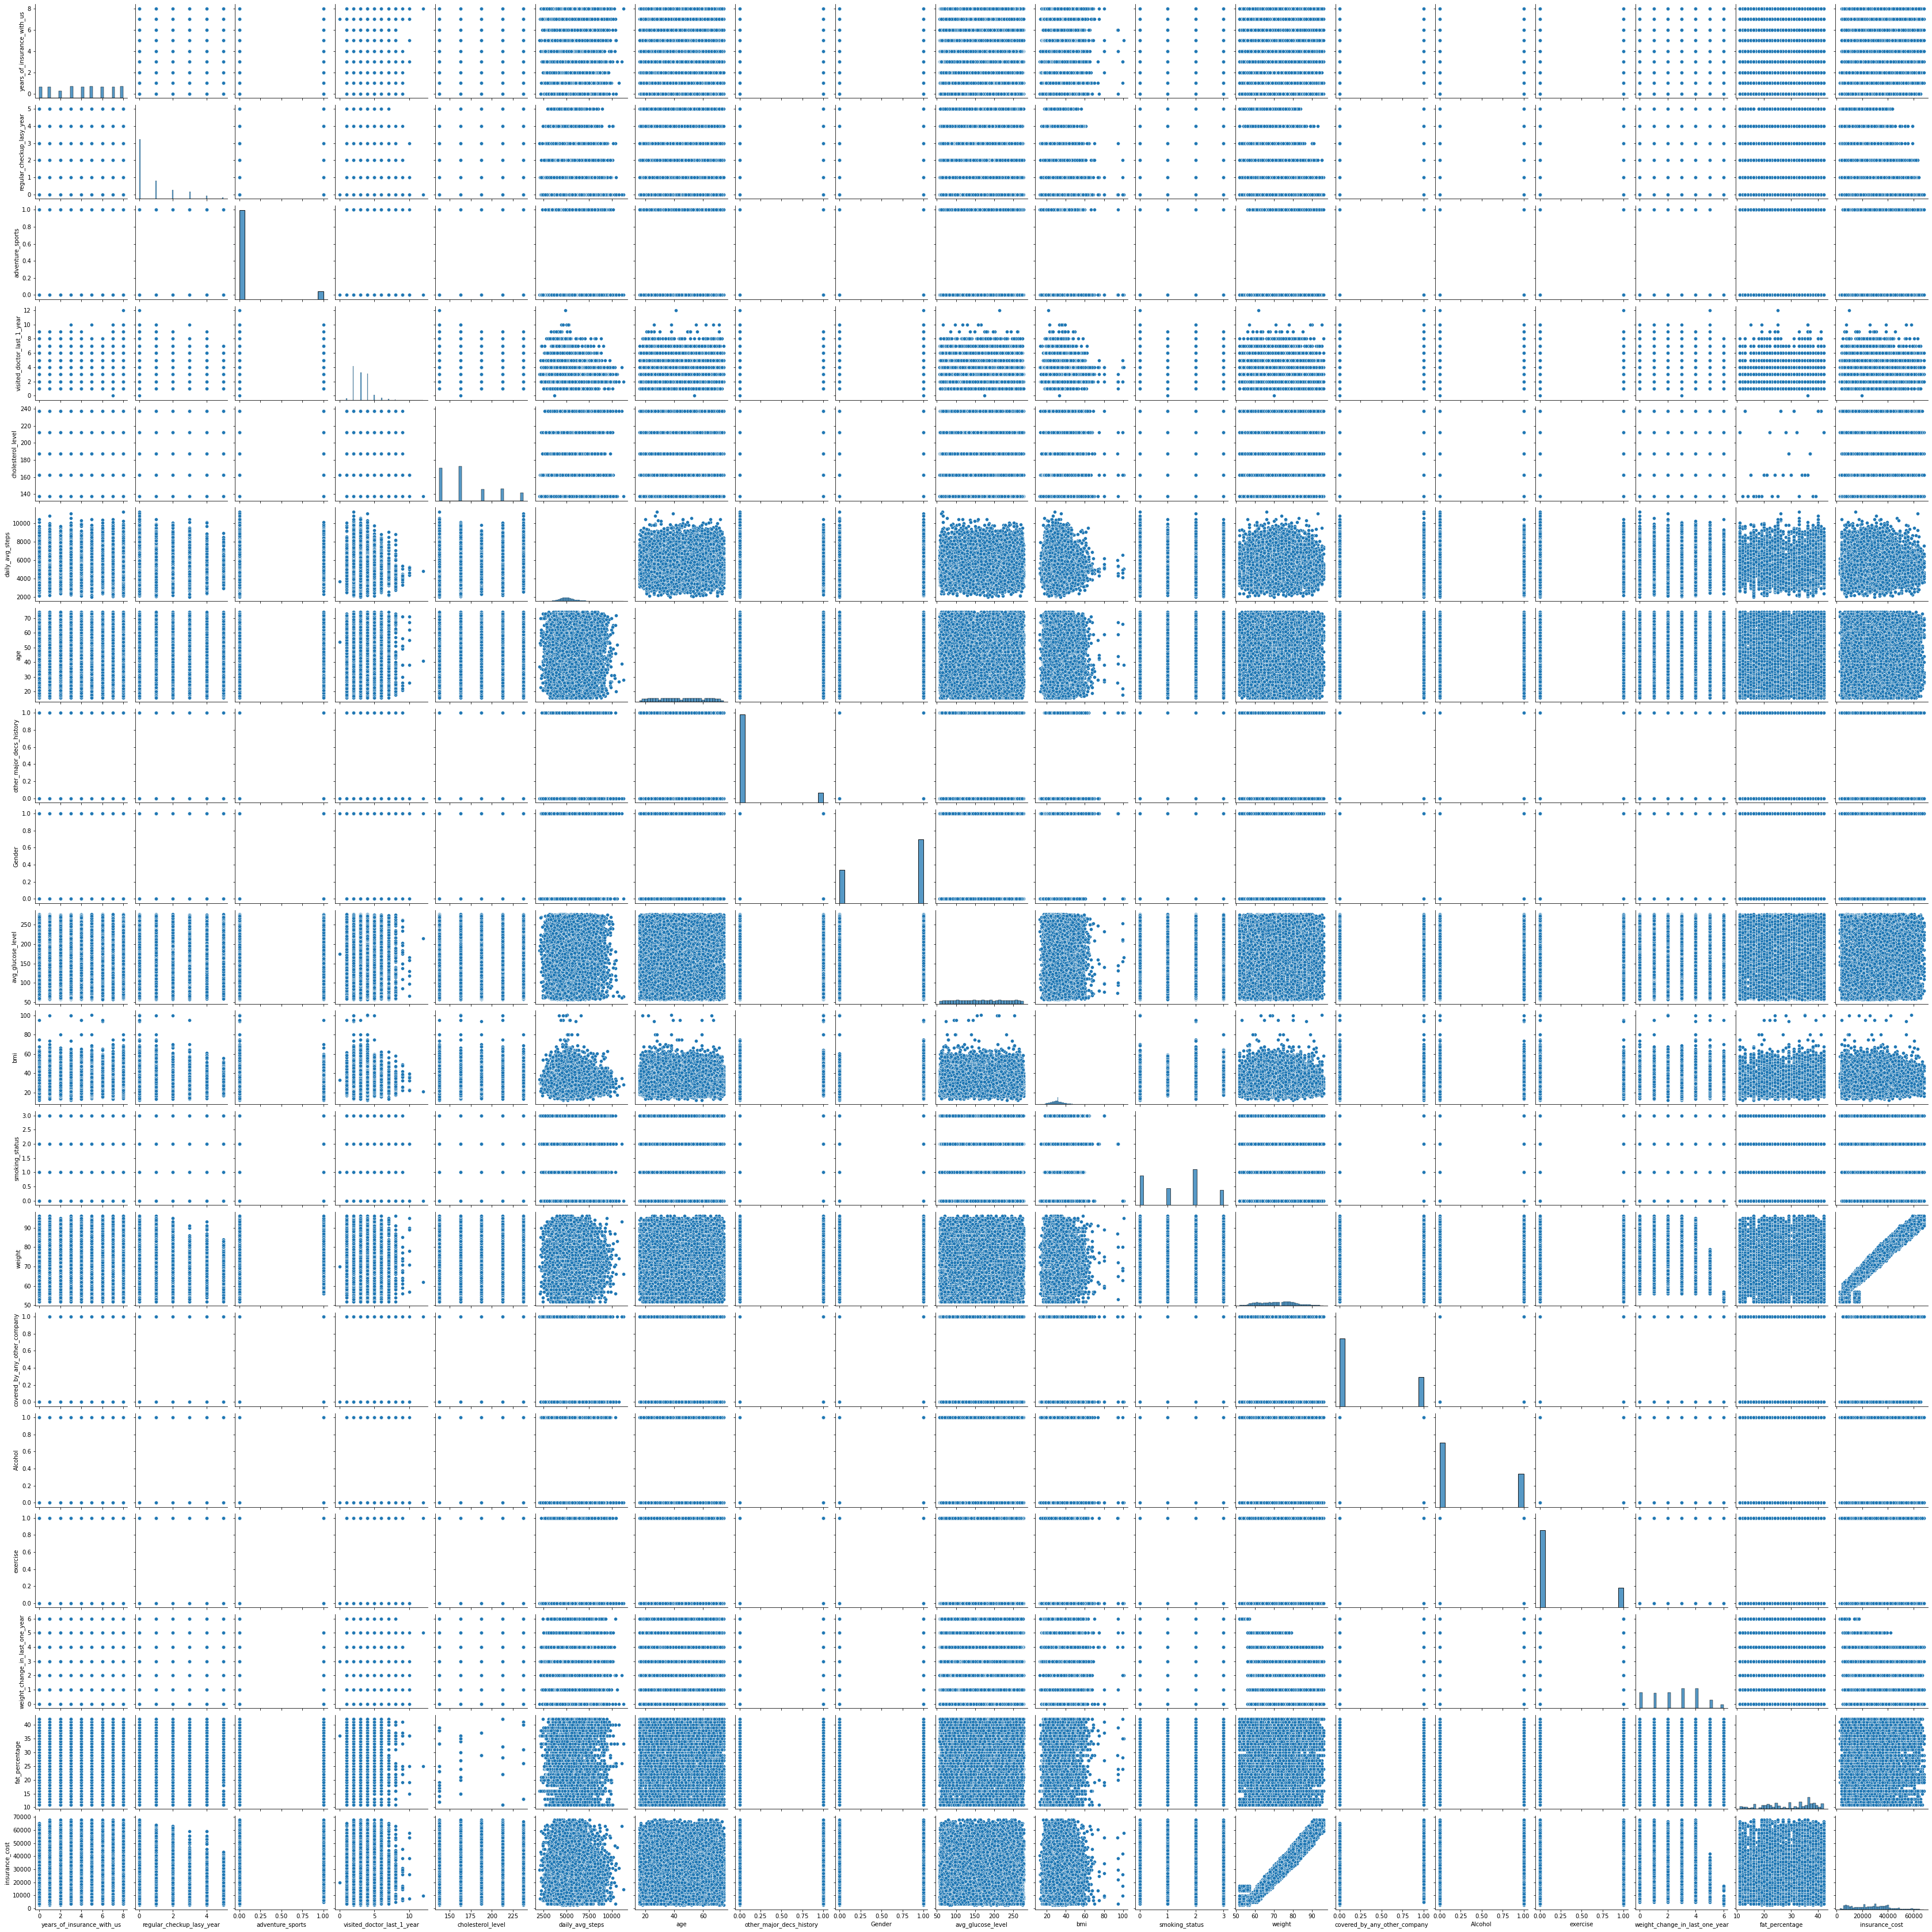

In [24]:
sns.pairplot(data)

In [25]:
y_data = data['insurance_cost']
x_data = data.drop(['insurance_cost'],axis=1)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.2, shuffle = True, random_state = 8)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state= 8)

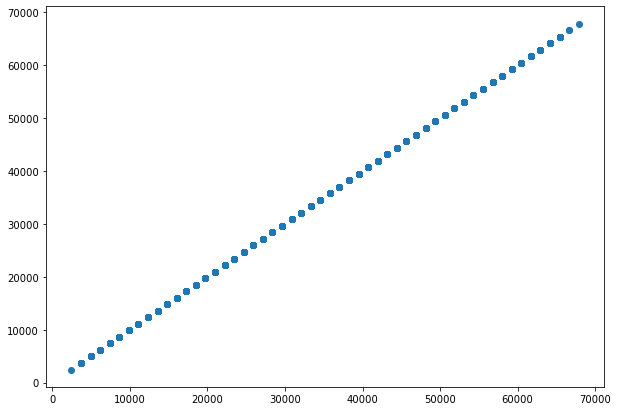

In [33]:
fig = plt.figure(figsize=(10,7))
plt.scatter(y_val,y_val)

In [34]:
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

Root Mean Squared Error : 3340.0199952850685
R2 Score : 0.9464215648853748
Variance score : 0.9464533082858236


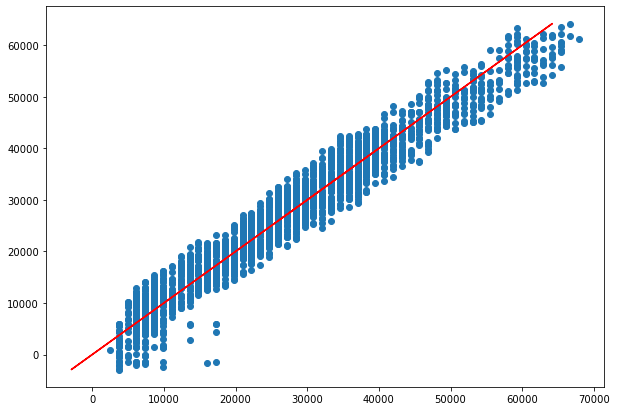

In [35]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr = regr.fit(x_train,y_train)
y_pred = regr.predict(x_val)
print("Root Mean Squared Error :", mean_squared_error(y_val,y_pred,squared=False))
print("R2 Score :",r2_score(y_val,y_pred))
print("Variance score :",explained_variance_score(y_val,y_pred))
fig = plt.figure(figsize=(10,7))
plt.scatter(y_val,y_pred)
plt.plot(y_pred,y_pred,'r')

Root Mean Squared Error : 14430.844633334707
R2 Score : -0.00017361453329689525
Variance score : 1.358519200256314e-05


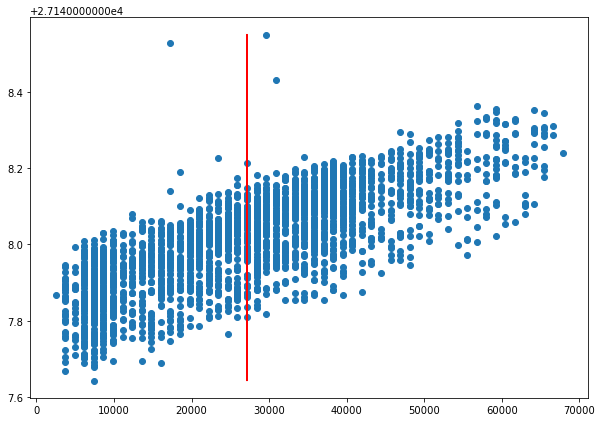

In [36]:
from sklearn.svm import SVR
regr = SVR()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_val)
print("Root Mean Squared Error :",mean_squared_error(y_val,y_pred,squared=False))
print("R2 Score :",r2_score(y_val,y_pred))
print("Variance score :",explained_variance_score(y_val,y_pred))
fig = plt.figure(figsize=(10,7))
plt.scatter(y_val,y_pred)
plt.plot(y_pred,y_pred,'r')

Root Mean Squared Error : 3340.1240655771553
R2 Score : 0.9464182259770635
Variance score : 0.9464502278796311


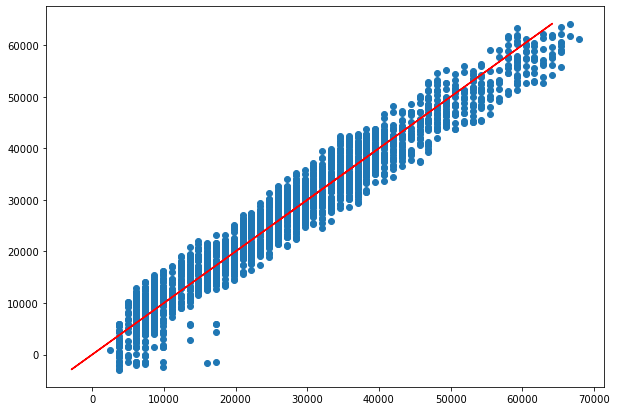

In [37]:
from sklearn.linear_model import Lasso
regr = Lasso()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_val)
print("Root Mean Squared Error :",mean_squared_error(y_val,y_pred,squared=False))
print("R2 Score :",r2_score(y_val,y_pred))
print("Variance score :",explained_variance_score(y_val,y_pred))
fig = plt.figure(figsize=(10,7))
plt.scatter(y_val,y_pred)
plt.plot(y_pred,y_pred,'r')

Root Mean Squared Error : 3145.9294253292487
R2 Score : 0.9524675891289227
Variance score : 0.9524829473978257


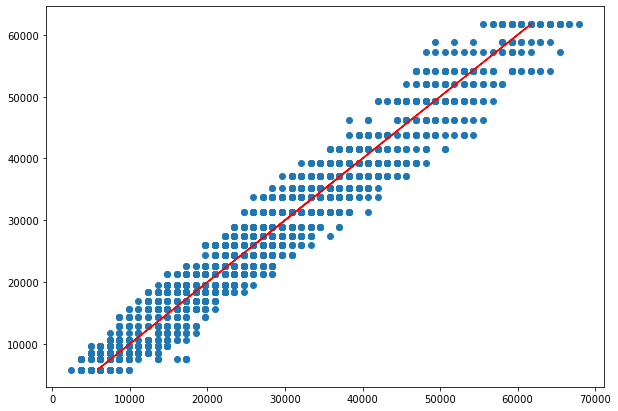

In [38]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=5)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_val)
print("Root Mean Squared Error :",mean_squared_error(y_val,y_pred,squared=False))
print("R2 Score :",r2_score(y_val,y_pred))
print("Variance score :",explained_variance_score(y_val,y_pred))
fig = plt.figure(figsize=(10,7))
plt.scatter(y_val,y_pred)
plt.plot(y_pred,y_pred,'r')

Mean Squared Error : 3100.976060357454
R2 Score : 0.953816300542709
Variance score : 0.9538252868120033


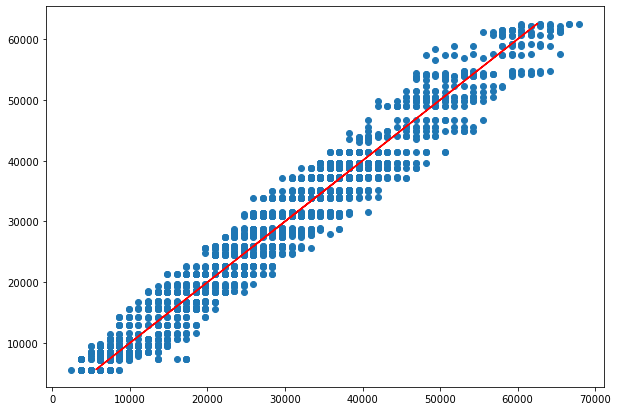

In [39]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_val)
print("Mean Squared Error :",mean_squared_error(y_val,y_pred,squared=False))
print("R2 Score :",r2_score(y_val,y_pred))
print("Variance score :",explained_variance_score(y_val,y_pred))
fig = plt.figure(figsize=(10,7))
plt.scatter(y_val,y_pred)
plt.plot(y_pred,y_pred,'r')

Mean Squared Error : 3340.019712939839
R2 Score : 0.9464215739437726
Variance score : 0.9464533179638857


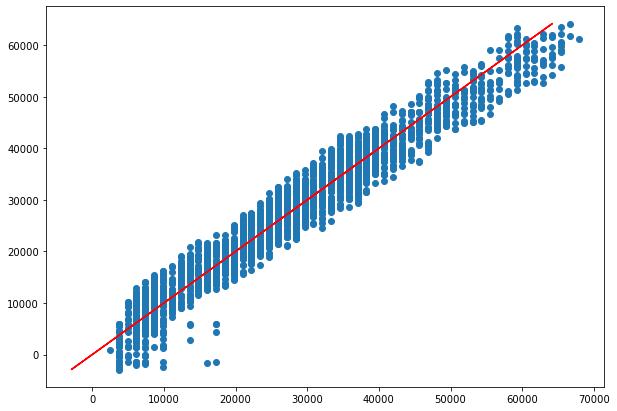

In [40]:
from sklearn.linear_model import Ridge
regr = Ridge()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_val)
print("Mean Squared Error :",mean_squared_error(y_val,y_pred,squared=False))
print("R2 Score :",r2_score(y_val,y_pred))
print("Variance score :",explained_variance_score(y_val,y_pred))
fig = plt.figure(figsize=(10,7))
plt.scatter(y_val,y_pred)
plt.plot(y_pred,y_pred,'r')

Root Mean Squared Error : 3112.331556064442
R2 Score : 0.9534043305748592
Variance score : 0.9534045387797623


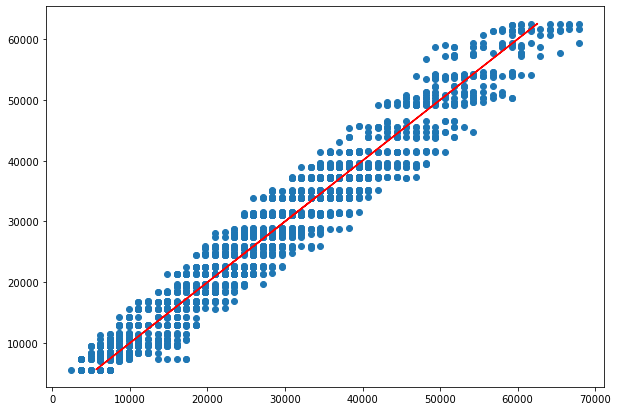

In [41]:
regr = RandomForestRegressor(max_depth=5)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred,squared=False))
print("R2 Score :",r2_score(y_test,y_pred))
print("Variance score :",explained_variance_score(y_test,y_pred))
fig = plt.figure(figsize=(10,7))
plt.scatter(y_test,y_pred)
plt.plot(y_pred,y_pred,'r')

30850.0
[33945.68940799]
14808.0
[19380.52205337]
32084.0
[35124.44983222]
9872.0
[9544.49615149]
54296.0
[53900.79822073]
6170.0
[9544.49615149]
18510.0
[19380.52205337]
13574.0
[10607.59578992]
28382.0
[27994.60945516]
54296.0
[54106.62005208]


/Users/charansaikondapaneni/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/charansaikondapaneni/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/charansaikondapaneni/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/charansaikondapaneni/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/charansaikondapaneni/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but

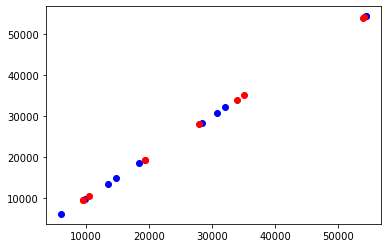

In [42]:
import random
i=1
l1 = []
l2 = []
while(i<=10):
    x = random.randint(0,25000)
    test = data.iloc[x]
    d = test[:-1]
    e = test[-1]
    l1.append(e)
    print(e)
    d = np.array(d)
    d = d.reshape(1,-1)
    pred = regr.predict(d)
    l2.append(pred)
    print(pred)
    i=i+1
plt.scatter(l1,l1,color='b')
plt.scatter(l2,l2,color='r')
plt.show()